# Google Trend for Loan Searches

The goal of this analysis is to find seasonality for google searches for keyword loan.
In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly.

The result of this analysis can be used to align the timing of marketing campaigns for loan companies to optimize the effectiveness of the campaign. i.e. doing more ads when more people are looking for loans.

First thing first, I imported data analysis libraries and Visualization packages.

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from fbprophet import Prophet
from datetime import datetime

Then I loaded the CSV file that includes Google trend for loan in the past 5 years. This is how the first 5 rows of the data looks like:

In [3]:
df = pd.read_csv('/Users/tara.ahmadi/Desktop/tara.ahmadi/Forcasting/Loan Google Trend - 5 years.csv')
df.head()

,Week,loan: (Canada)
0,2013-10-20,60
1,2013-10-27,59
2,2013-11-03,60
3,2013-11-10,57
4,2013-11-17,55


The search index column (loan:(Canada) shows the popularity of the search. A value of 100 is the peak of popularity. Other values are relative to the peak.

Now that I have the timeseries I need to use a tool to perform the modeling.

In this analysis I'm using a forecasting library called Prophet. Prophet is an easy to use forecasting tool developed by the Facebook team which can produce high quality forecasts. 

Like any other tools, Prophet has it's own restrictions. For example, Prophet imposes the strict condition that the input columns be named ds (the time column) and y (the metric column). so I renamed the columns in DataFrame and changed the time format from month to datetime:

In [4]:
df = df.rename(columns={'Week': 'ds',
                        'loan: (Canada)': 'y'})
df['ds'] = pd.DatetimeIndex(df['ds'])
df.head()


,ds,y
0,2013-10-20,60
1,2013-10-27,59
2,2013-11-03,60
3,2013-11-10,57
4,2013-11-17,55


To get a better understanding of the dataset, I made a graph out of it:

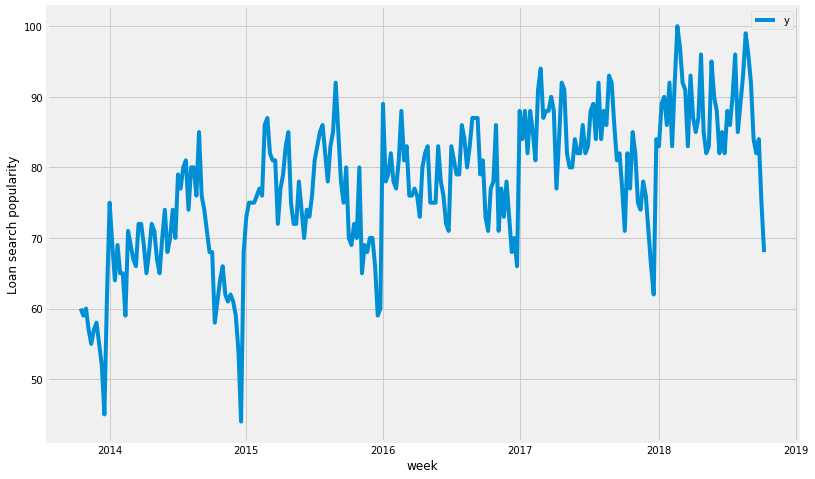

In [5]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Loan search popularity')
ax.set_xlabel('week')

plt.show()

Prophet enables to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [6]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, weekly_seasonality= False, daily_seasonality=False,seasonality_prior_scale=1.0)

In [7]:
my_model.fit(df)

In order to obtain forecasts of this time series, I need to provide Prophet with a new DataFrame containing a ds column that holds the dates for which I want predictions. Conveniently, I do not have to concern about manually creating this DataFrame, as Prophet provides the 'make_future_dataframe' helper function:

In [8]:
future_dates = my_model.make_future_dataframe(periods=52)
future_dates.tail()

,ds
308,2018-12-01
309,2018-12-02
310,2018-12-03
311,2018-12-04
312,2018-12-05


In the code chunk above, I instructed Prophet to generate 36 datestamps in the future.

When working with Prophet, it is important to consider the frequency of our time series. Because I'm working with weekly data, I clearly specified the desired frequency of the timestamps. Therefore, the make_future_dataframe generated 52 weekly timestamps. 

In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
308,2018-12-01,78.815266,70.660302,86.609557
309,2018-12-02,78.436821,71.009912,86.170517
310,2018-12-03,77.994427,69.313646,86.170476
311,2018-12-04,77.493035,69.278744,85.441973
312,2018-12-05,76.939729,69.174935,85.592033


In [10]:
forecast['month'] = forecast['ds'].apply(lambda x: x.strftime('%B-%Y'))   
forecast.groupby(['month'])['yhat'].mean().head()

month
April-2014    70.433894
April-2015    76.841268
April-2016    80.921037
April-2017    84.837563
April-2018    87.769699
Name: yhat, dtype: float64

Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

ds: the datestamp of the forecasted value

yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)

yhat_lower: the lower bound of our forecasts

yhat_upper: the upper bound of our forecasts

A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts:


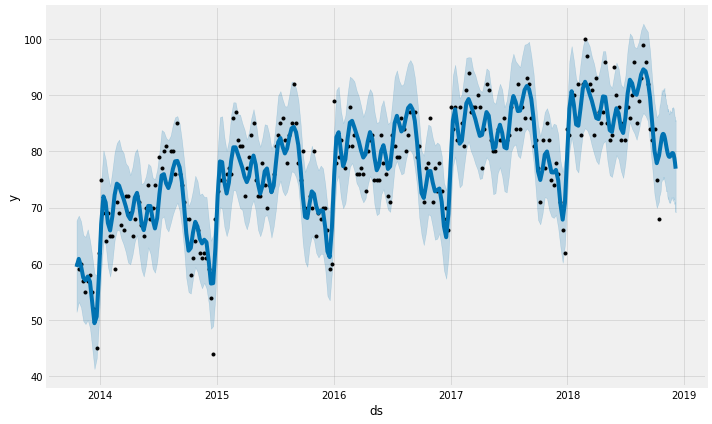

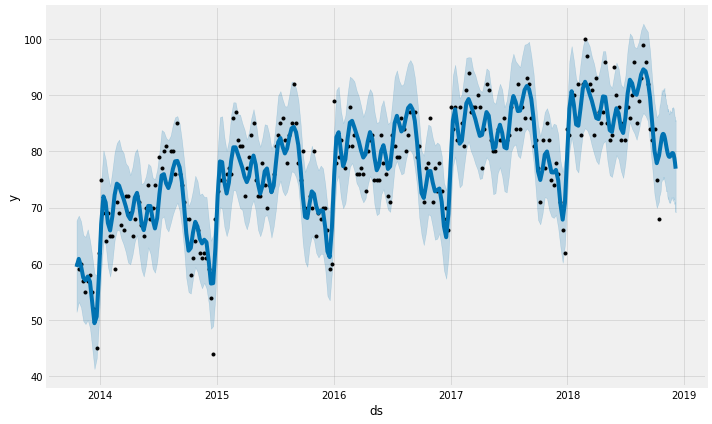

In [11]:
my_model.plot(forecast,uncertainty=True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values:

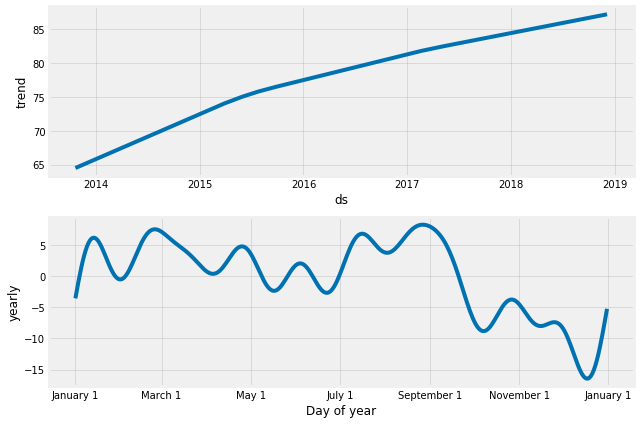

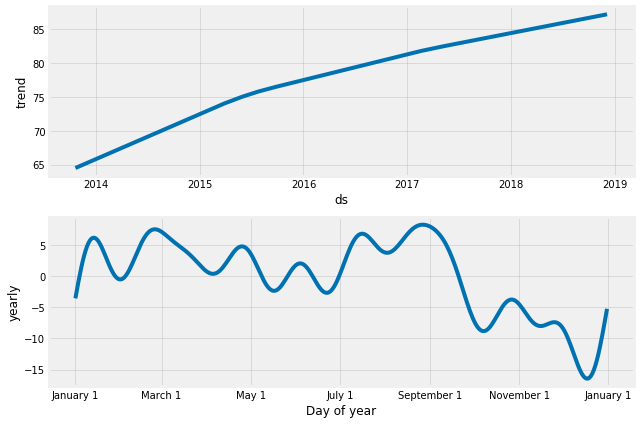

In [12]:
my_model.plot_components(forecast)

## Conclusion

Using Google Trends, we can identify a relative level of interest over time for a keyword phrase.
 
Google Trends’ data for search term “loan” for the past 5 years indicates an upward trend. i.e. searches for loan has become more and more popular over time.

By extracting the seasonality trend, we can see in which months, searches for loan became more popular. For example, searcing for loan increase during summer from July to September.

Another interesting trend that can be seen here is that people seems to search for loan more toward the end of the month or the beginning of the month and during weekdays not weekends!

This information can be used to optimize the timing of marketing campaigns to increase the return of investment (ROI).